In [2]:
import pandas as pd

### GoSales Dataset
Source: https://raw.githubusercontent.com/sandra-calvo/machine-learning-DSX/master/GoSales_Tx_LogisticRegression.csv

Datafields: https://developer.ibm.com/dwblog/2017/watson-machine-learning-within-ibm-data-science-experience/

* IS_TENT : It has the value TRUE or FALSE which tells us if a customer has bought a tent or not.   
* GENDER : Customer's gender  
* AGE : Customer's age (F, M)  
* MARITAL_STATUS : Customer's marital status ('married', 'single', 'unspecified')  
* PROFESSION : Customer's profession ('Professional', 'Other', 'Hospitality', 'Retired', 'Retail', 'Sales', 'Trades', 'Student', 'Executive') 

In [3]:
gosales = pd.read_csv('../datasets/GoSales_Tx_LogisticRegression.csv')

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
8957,False,F,39,Married,Professional
47626,False,F,49,Married,Executive
40158,False,M,42,Married,Retired
52636,False,F,28,Single,Other
2619,False,F,31,Married,Hospitality
6442,False,F,27,Single,Retail
47251,True,M,19,Single,Other
21364,False,F,27,Single,Retail
4640,False,F,30,Married,Retail
46825,False,F,43,Unspecified,Hospitality


#### Describe age column

In [4]:
gosales.AGE.describe()

count    60252.000000
mean        34.187479
std         10.105477
min         17.000000
25%         26.000000
50%         33.000000
75%         41.000000
max         69.000000
Name: AGE, dtype: float64

#### Plot bar graph for categorical values

C:\Users\julien\AppData\Local\Temp\ipykernel_23052\331758380.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(gosales['IS_TENT']).plot.bar()


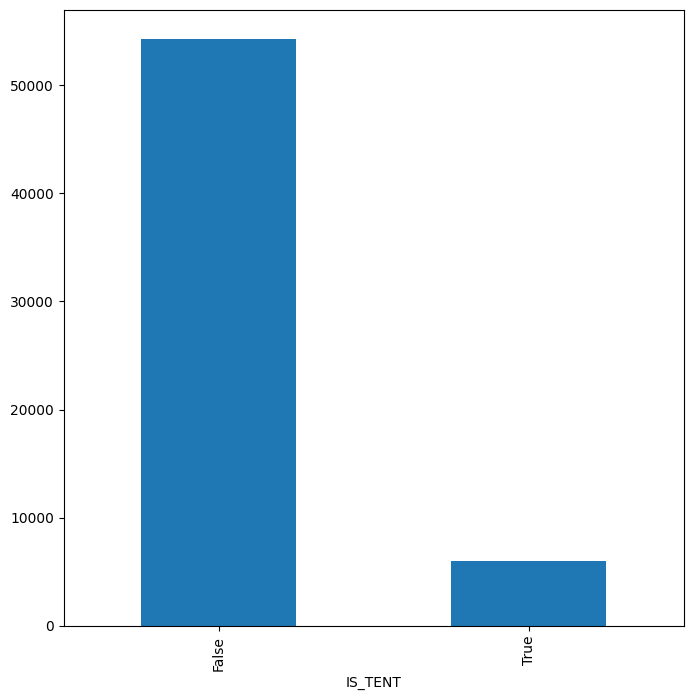

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
pd.value_counts(gosales['IS_TENT']).plot.bar()
plt.show()

C:\Users\julien\AppData\Local\Temp\ipykernel_23052\1398085558.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()


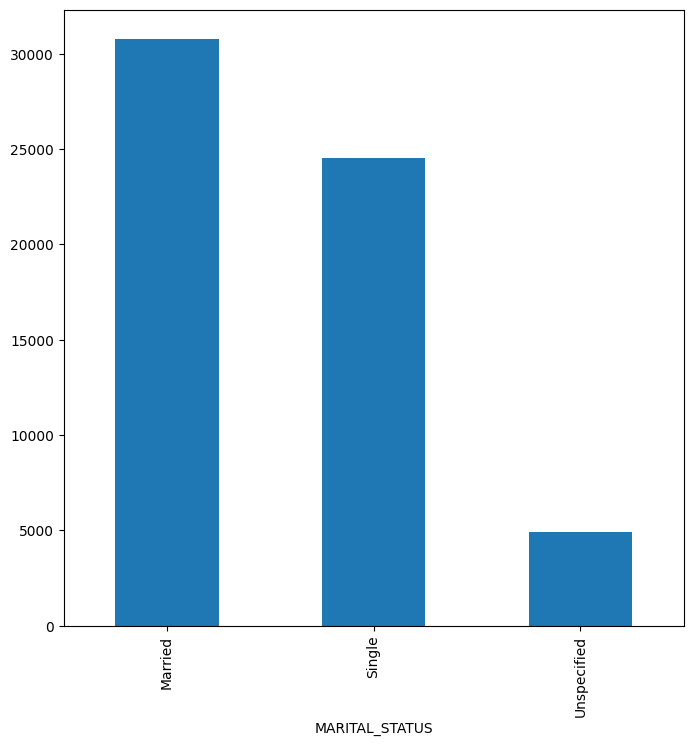

In [6]:
plt.figure(figsize=(8, 8))
pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()
plt.show()

C:\Users\julien\AppData\Local\Temp\ipykernel_23052\787246997.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(gosales['GENDER']).plot.bar()


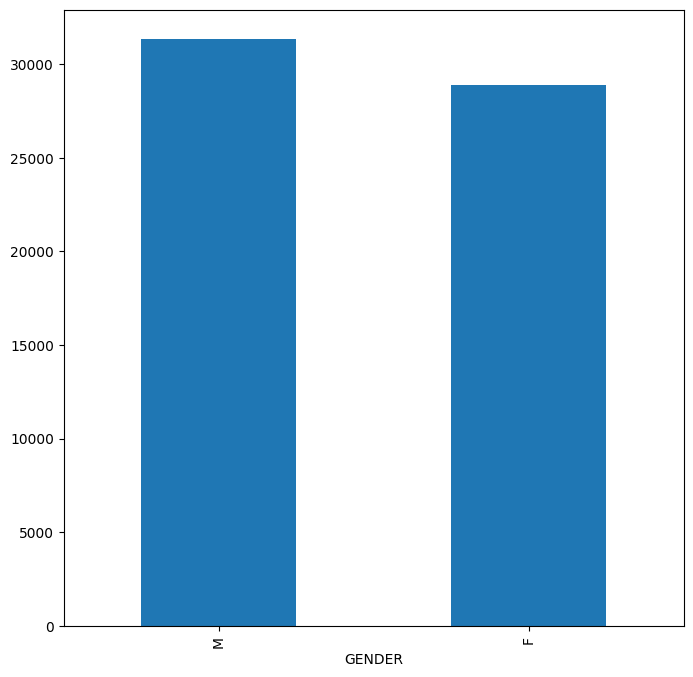

In [7]:
plt.figure(figsize=(8, 8))
pd.value_counts(gosales['GENDER']).plot.bar()
plt.show()

C:\Users\julien\AppData\Local\Temp\ipykernel_23052\3448421832.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(gosales['PROFESSION']).plot.bar()


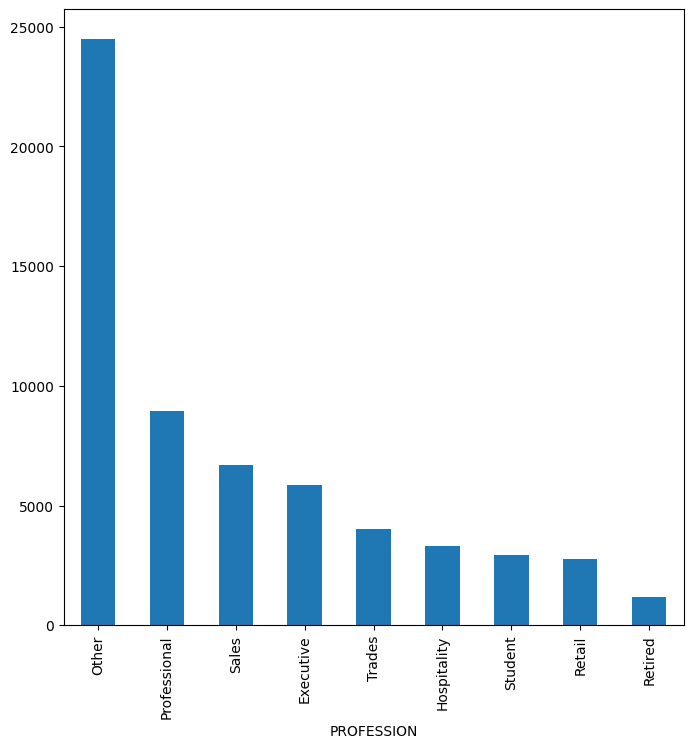

In [8]:
plt.figure(figsize=(8, 8))
pd.value_counts(gosales['PROFESSION']).plot.bar()
plt.show()

### Label Encoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

##### Here we are applying label encoding on 'GENDER' column

In [9]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

gender = ['M', 'F']
label_encoding = label_encoding.fit(gender)

label_encoding.classes_

array(['F', 'M'], dtype='<U1')

In [10]:
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
19148,False,M,57,Unspecified,Other
39986,False,F,46,Married,Other
29742,False,M,47,Unspecified,Other
6594,False,M,45,Married,Other
51092,False,F,28,Married,Professional
37103,False,F,32,Married,Other
12195,False,F,47,Married,Executive
45878,False,M,31,Married,Executive
1168,False,M,43,Married,Other
23050,False,F,60,Married,Other


In [ ]:
### One-hot Encoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [11]:
gosales[['MARITAL_STATUS']].sample(5)

,MARITAL_STATUS
54648,Married
36850,Married
16538,Married
54687,Single
51969,Single


In [12]:
one_hot_encoding = preprocessing.OneHotEncoder()

one_hot_encoding = one_hot_encoding.fit(gosales['MARITAL_STATUS'].values.reshape(-1, 1))

In [13]:
one_hot_encoding.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [14]:
one_hot_labels = one_hot_encoding.transform(gosales['MARITAL_STATUS'].values.reshape(-1, 1)).toarray()

one_hot_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], shape=(60252, 3))

In [15]:
one_hot_labels.shape

(60252, 3)

#### Creating a dataframe for encoded values

In [16]:
labels_df = pd.DataFrame()

labels_df['MARITAL_STATUS_Married'] = one_hot_labels[:,0]
labels_df['MARITAL_STATUS_Single'] = one_hot_labels[:,1]
labels_df['MARITAL_STATUS_Unspecified'] = one_hot_labels[:,2]

labels_df.head(10)

,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


#### Concatenate the one hot_encoded columns with original dataset and dropping the original MARITAL_STATUS column

In [18]:
encoded_df = pd.concat([gosales, labels_df], axis=1)
encoded_df.drop('MARITAL_STATUS', axis=1, inplace=True)

In [19]:
encoded_df.sample(10)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
34985,False,M,36,Other,0.0,1.0,0.0
5979,False,F,32,Hospitality,1.0,0.0,0.0
8790,False,F,39,Professional,0.0,0.0,1.0
44490,False,F,45,Other,1.0,0.0,0.0
11108,False,F,39,Professional,1.0,0.0,0.0
42176,False,F,60,Retired,1.0,0.0,0.0
44330,False,M,44,Other,0.0,1.0,0.0
15624,False,M,22,Student,0.0,1.0,0.0
37096,False,M,29,Other,1.0,0.0,0.0
59822,False,F,20,Hospitality,0.0,1.0,0.0


#### We can do one hot encoding using the pandas get_dummies( ) function

In [20]:
gosales = pd.get_dummies(encoded_df, columns=['PROFESSION'])

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
46937,False,F,20,0.0,1.0,0.0,False,False,False,True,False,False,False,False,False
703,False,F,37,1.0,0.0,0.0,True,False,False,False,False,False,False,False,False
13106,True,F,25,0.0,1.0,0.0,False,False,False,True,False,False,False,False,False
52288,False,F,34,1.0,0.0,0.0,False,False,True,False,False,False,False,False,False
55362,False,F,31,1.0,0.0,0.0,False,True,False,False,False,False,False,False,False
22324,False,F,37,0.0,0.0,1.0,False,False,True,False,False,False,False,False,False
25934,False,F,27,0.0,1.0,0.0,False,False,False,False,True,False,False,False,False
41611,False,F,38,1.0,0.0,0.0,False,False,False,True,False,False,False,False,False
32975,False,M,41,1.0,0.0,0.0,False,False,True,False,False,False,False,False,False
47646,False,M,25,0.0,1.0,0.0,False,False,False,False,False,False,False,True,False


### Using pandas get_dummies( ) function we can scale the whole data

##### So here we are loading dataset again and then applying one hot encoding on the whole dataset

In [21]:
gosales = pd.read_csv('../datasets/GoSales_Tx_LogisticRegression.csv')

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
15637,False,F,22,Single,Other
29430,True,M,41,Single,Professional
21946,False,M,27,Single,Other
16677,False,M,49,Married,Other
2948,False,M,54,Married,Other
54490,False,F,40,Unspecified,Hospitality
12114,False,F,35,Single,Other
54389,False,M,50,Unspecified,Other
41233,True,M,25,Single,Trades
52823,False,F,36,Unspecified,Hospitality


In [22]:
gosales = pd.get_dummies(gosales)

gosales.sample(10)

,IS_TENT,AGE,GENDER_F,GENDER_M,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
59889,False,45,True,False,True,False,False,False,True,False,False,False,False,False,False,False
33959,False,38,True,False,False,False,True,False,False,True,False,False,False,False,False,False
4812,False,29,True,False,False,True,False,False,False,True,False,False,False,False,False,False
16247,False,48,False,True,True,False,False,False,False,False,True,False,False,False,False,False
23597,False,29,True,False,True,False,False,False,False,True,False,False,False,False,False,False
18509,False,20,False,True,False,True,False,False,False,False,True,False,False,False,False,False
49178,False,43,True,False,True,False,False,False,False,False,False,False,True,False,False,False
2785,False,26,True,False,False,True,False,False,False,True,False,False,False,False,False,False
59901,False,48,True,False,True,False,False,False,False,True,False,False,False,False,False,False
31046,False,25,True,False,False,True,False,False,False,True,False,False,False,False,False,False
